In [1]:
require(ggplot2)
require(fitdistrplus)
require(gridExtra)
require(VGAM)
options(warn=-1)

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Loading required package: fitdistrplus

Loading required package: MASS

Loading required package: survival

Loading required package: npsurv

Loading required package: lsei

Loading required package: gridExtra

Loading required package: VGAM

Loading required package: stats4

Loading required package: splines



In [2]:
ajuste=function(dados,opcao)
{
  dist1=fitdist(dados,"gamma");est1<<- dist1$estimate
  dist2=fitdist(dados,"lnorm");est2<<- dist2$estimate
  dist3=fitdist(dados,"weibull");est3<<- dist3$estimate
  dist4=fitdist(dados,"logis");est4<<- dist4$estimate
  dist5=fitdist(dados,"norm");est5<<- dist5$estimate
  dist6=fitdist(dados,"cauchy");est6<<- dist6$estimate
  dist7=fitdist(dados,"unif");est7<<- dist7$estimate
  
  if(opcao==1)
  {
    a=(ggplot(data.frame(x=dados),aes(x))+geom_histogram(aes(y =..density..),fill="#00AFBB",color="black")+
         stat_function(fun = dgamma, args = list( est1[1], est1[2]),aes(fill="black"),size=1.2)
       +labs(title="Gamma distribution")+theme_minimal())
    
    
    b=(ggplot(data.frame(x=dados),aes(x))+geom_histogram(aes(y =..density..),fill="#00AFBB",color="black")
       +stat_function(fun = dweibull, args = list( est3[1], est3[2]),aes(fill="black"),size=1.2)
       +labs(title="Weibull distribution")+theme_minimal()
    )
    c=(ggplot(data.frame(x=dados),aes(x))+geom_histogram(aes(y =..density..),fill="#00AFBB",color="black")
       +stat_function(fun = dnorm, args = list( est5[1], est5[2]),aes(fill="black"),size=1.2)
       +labs(title="Normal distribution")+theme_minimal())
    
    d=(ggplot(data.frame(x=dados),aes(x))+geom_histogram(aes(y =..density..),fill="#00AFBB",color="black")
       +stat_function(fun = dlogis, args = list( est4[1], est4[2]),aes(fill="black"),size=1.2)
       +labs(title="Logistic distribution")+theme_minimal())
    grid.arrange(a,b,c,d,ncol=2)
  }else if(opcao==2)
  {
    e=(ggplot(data.frame(x=dados),aes(x))+geom_histogram(aes(y =..density..),fill="#00AFBB",color="black")
       +stat_function(fun = dlnorm, args = list( est2[1], est2[2]),aes(fill="black"),size=1.2)
       +labs(title="Lognormal distribution")+theme_minimal())
    
    est_rayleigh <<- sqrt(sum(x^2)/(2*length(x)))
    f=(ggplot(data.frame(x=dados),aes(x))+geom_histogram(aes(y =..density..),fill="#00AFBB",color="black")
       +stat_function(fun = drayleigh, args = list(sqrt(sum(dados^2)/(2*length(dados))) ),aes(fill="black"),size=1.2)
       +labs(title="Rayleigh distribution")+theme_minimal())
    
    g=(ggplot(data.frame(x=dados),aes(x))+geom_histogram(aes(y =..density..),fill="#00AFBB",color="black")
       +stat_function(fun = dcauchy, args = list(est6[1],est6[2]),aes(fill="black"),size=1.2)
       +labs(title="Cauchy distribution")+theme_minimal())
    
    h=(ggplot(data.frame(x=dados),aes(x))+geom_histogram(aes(y =..density..),fill="#00AFBB",color="black")
       +stat_function(fun = dunif, args = list(est7[1],est7[2]),aes(fill="black"),size=1.2)
       +labs(title="Uniform distribution")+theme_minimal())
    grid.arrange(e,f,g,h,ncol=2)
  }else if(opcao==3)
  {
    a1=ggplot(data.frame(x=dados), aes(sample=x)) +
      stat_qq(distribution = qgamma, dparams = est1) +
      stat_qq_line(distribution = qgamma, dparams = est1)+theme_minimal()+
    labs(title="Gamma distribution")
    
    a2=ggplot(data.frame(x=dados), aes(sample=x)) +
      stat_qq(distribution = qnorm, dparams = est5) +
      stat_qq_line(distribution = qnorm, dparams = est5)+theme_minimal()+
    labs(title="Normal distribution")
    
    a3=ggplot(data.frame(x=dados), aes(sample=x)) +
      stat_qq(distribution = qlnorm, dparams = est2) +
      stat_qq_line(distribution = qlnorm, dparams = est2)+theme_minimal()+
    labs(title="Lognormal distribution")
    
    a4=ggplot(data.frame(x=dados), aes(sample=x)) +
      stat_qq(distribution = qweibull, dparams = est3) +
      stat_qq_line(distribution = qweibull, dparams = est3) +theme_minimal()+
    labs(title="Weibull distribution")
    grid.arrange(a1,a2,a3,a4,ncol=2)
  }else if(opcao==5)
  {
    valor_p=data.frame(valor.p=c(ks.test(x,pgamma,est1[1],est1[2])$p.value,
                                 ks.test(x,plnorm,est2[1],est2[2])$p.value,
                                 ks.test(x,pweibull,est3[1],est3[2])$p.value,
                                 ks.test(x,plogis,est4[1],est4[2])$p.value,
                                 ks.test(x,pnorm,est5[1],est5[2])$p.value,
                                 ks.test(x,prayleigh,est_rayleigh)$p.value,
                                 ks.test(x,pcauchy,est6[1],est6[2])$p.value,
                                 ks.test(x,punif,est7[1],est7[2])$p.value))
    rownames(valor_p)=c("Gamma","Log-normal","Weibull","Logística","Normal","Rayleigh",
                        "Cauchy","Uniforme")
    
    round(valor_p,4)
  }
  else
  {
    b1=ggplot(data.frame(x=dados), aes(sample=x)) +
      stat_qq(distribution = qlogis, dparams = est4) +
      stat_qq_line(distribution = qlogis, dparams = est4)+theme_minimal()+
    labs(title="Logistic distribution")
    
    est_rayleigh <<- sqrt(sum(x^2)/(2*length(x)))
    b2=ggplot(data.frame(x=dados), aes(sample=x)) +
      stat_qq(distribution = qrayleigh, dparams = est_rayleigh) +
      stat_qq_line(distribution = qrayleigh, dparams = est_rayleigh)+
     theme_minimal()+labs(title="Rayleigh distribution")
    
    b3=ggplot(data.frame(x=dados), aes(sample=x)) +
      stat_qq(distribution = qcauchy, dparams = est6) +
      stat_qq_line(distribution = qcauchy, dparams = est6)+theme_minimal()+
    labs(title="Cauchy distribution")
    
    b4=ggplot(data.frame(x=dados), aes(sample=x)) +
      stat_qq(distribution = qunif, dparams = est7) +
      stat_qq_line(distribution = qunif, dparams = est7)+theme_minimal()+
    labs(title="Uniform distribution")
    grid.arrange(b1,b2,b3,b4,ncol=2)
  }
}

In [3]:
x=rgamma(350,2,2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



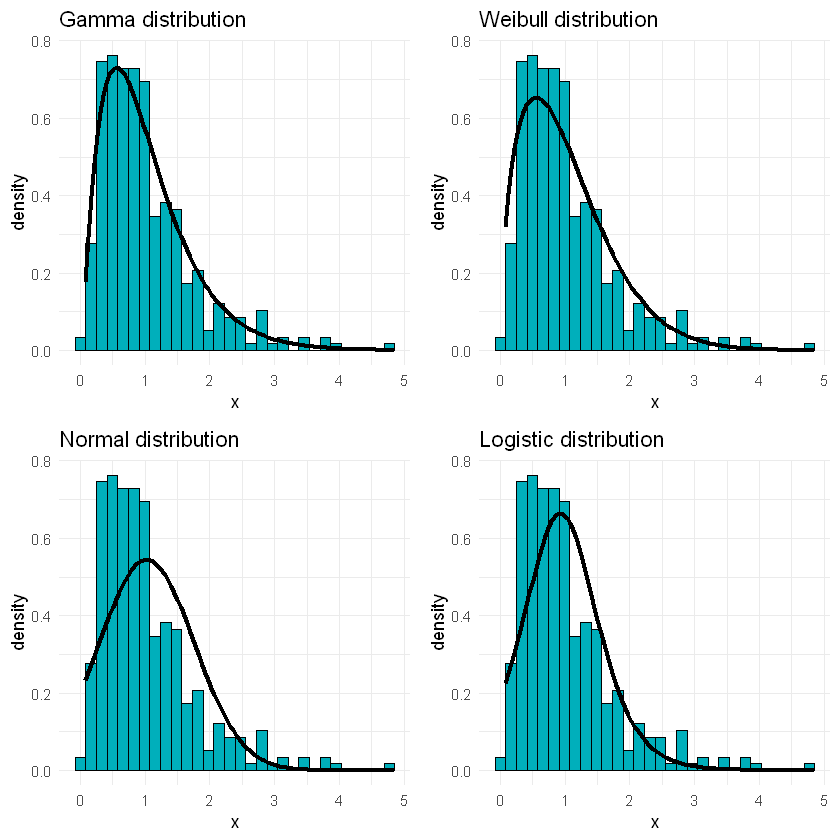

In [4]:
ajuste(x,1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



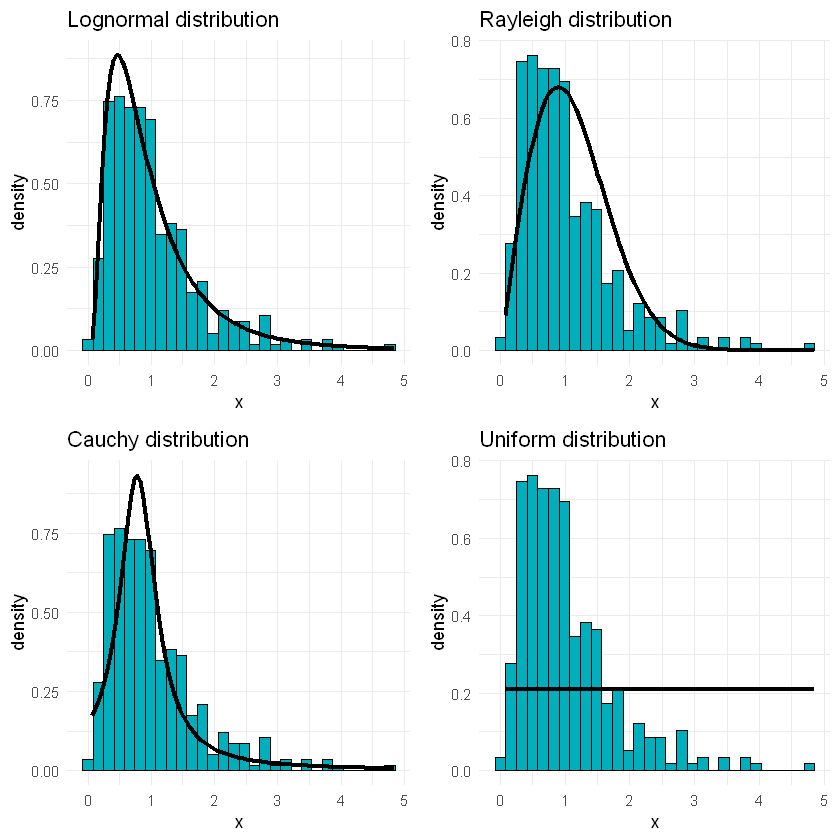

In [5]:
ajuste(x,2)

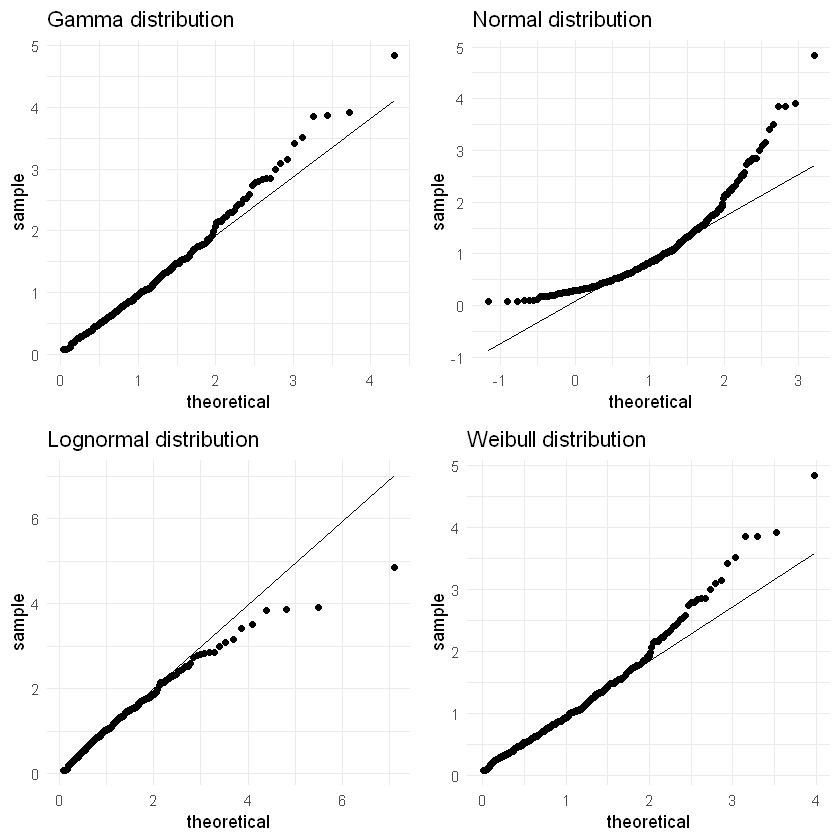

In [6]:
ajuste(x,3)

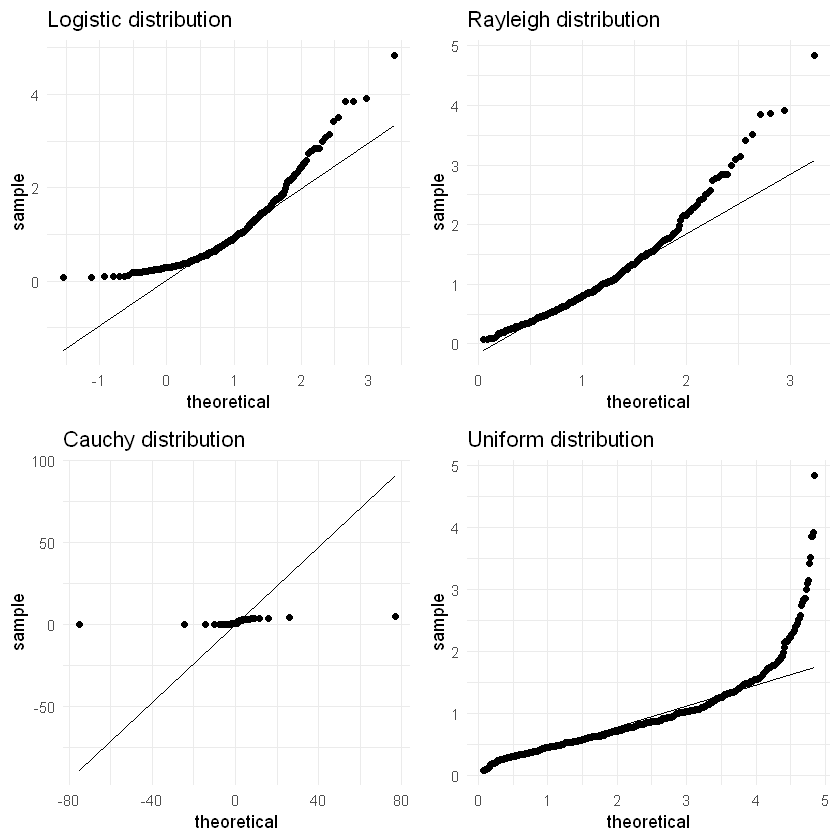

In [7]:
ajuste(x,4)

In [8]:
ajuste(x,5)

,valor.p
,<dbl>
Gamma,0.5176
Log-normal,0.6275
Weibull,0.1356
Logística,0.0018
Normal,0.0000
Rayleigh,0.0000
Cauchy,0.0000
Uniforme,0.0000


In [9]:
x=rnorm(1000,7,1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



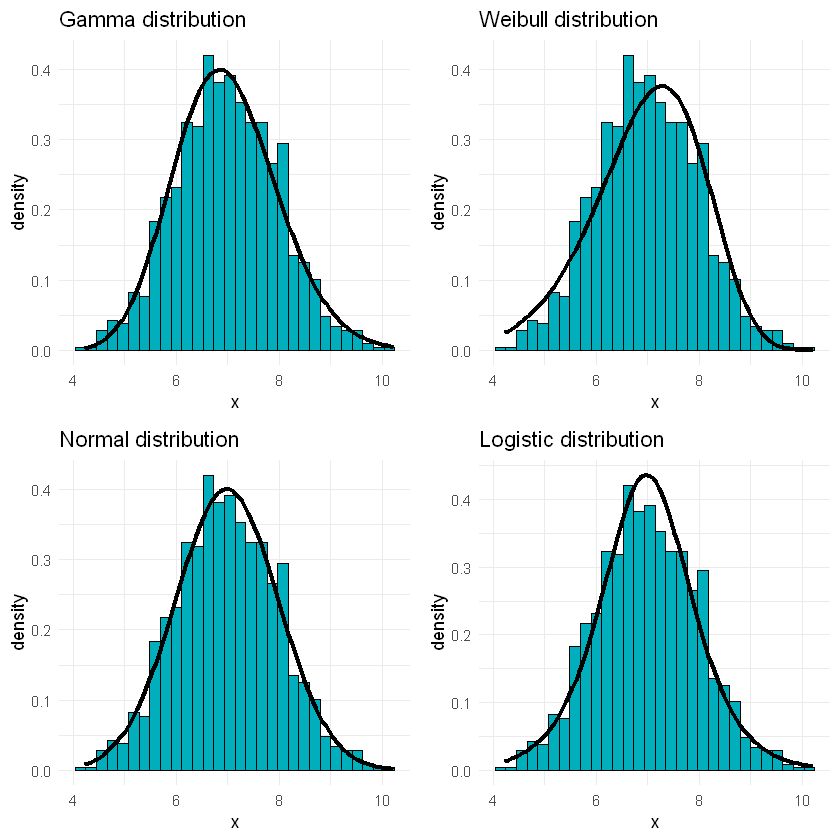

In [10]:
ajuste(x,1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



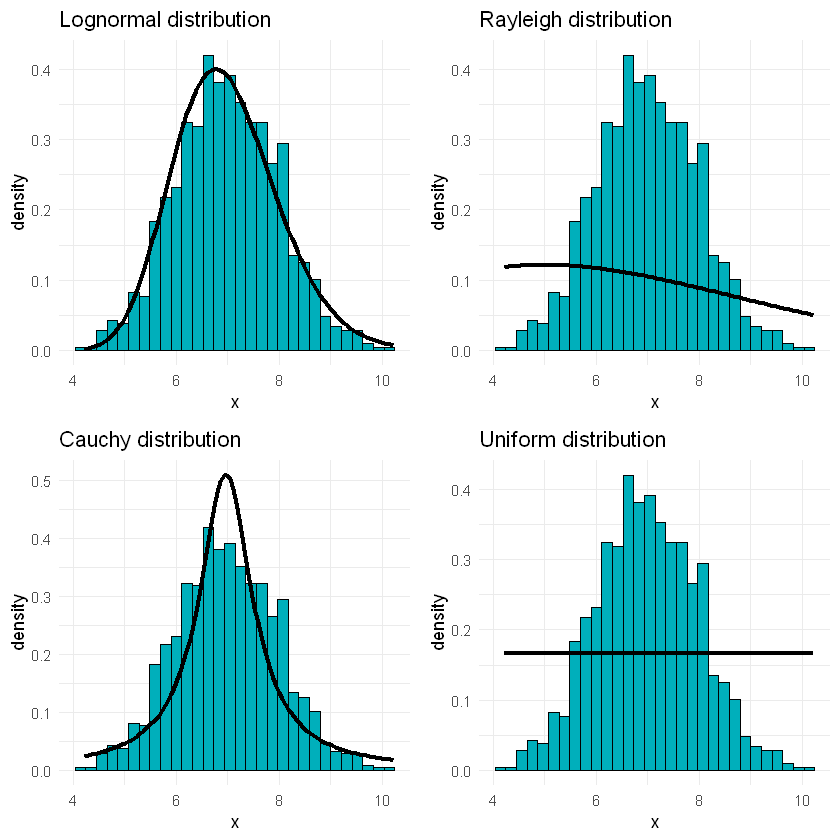

In [11]:
ajuste(x,2)

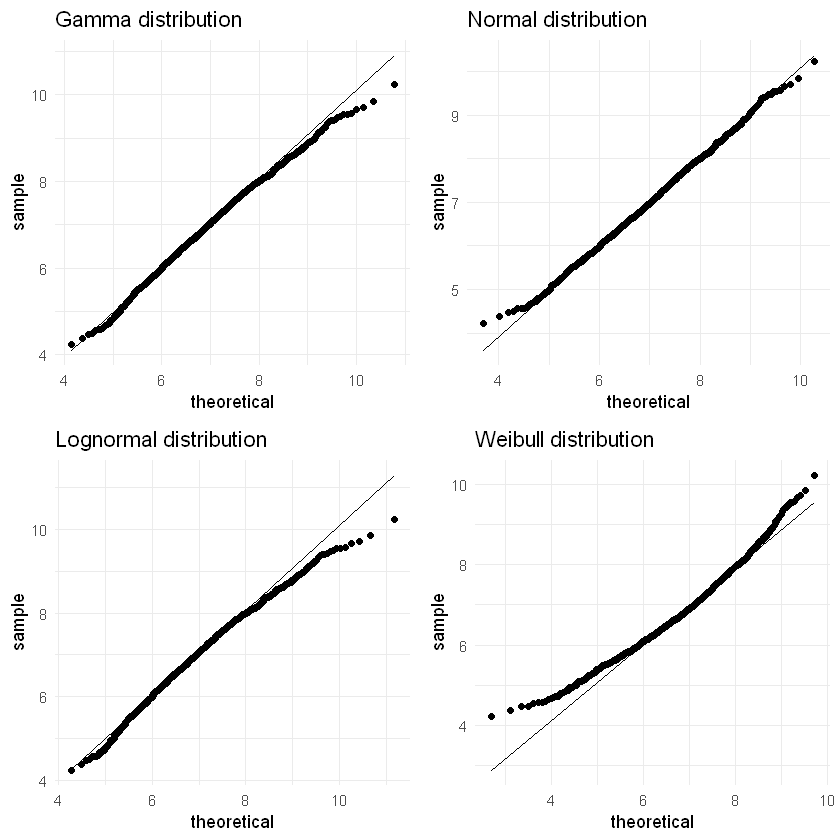

In [12]:
ajuste(x,3)

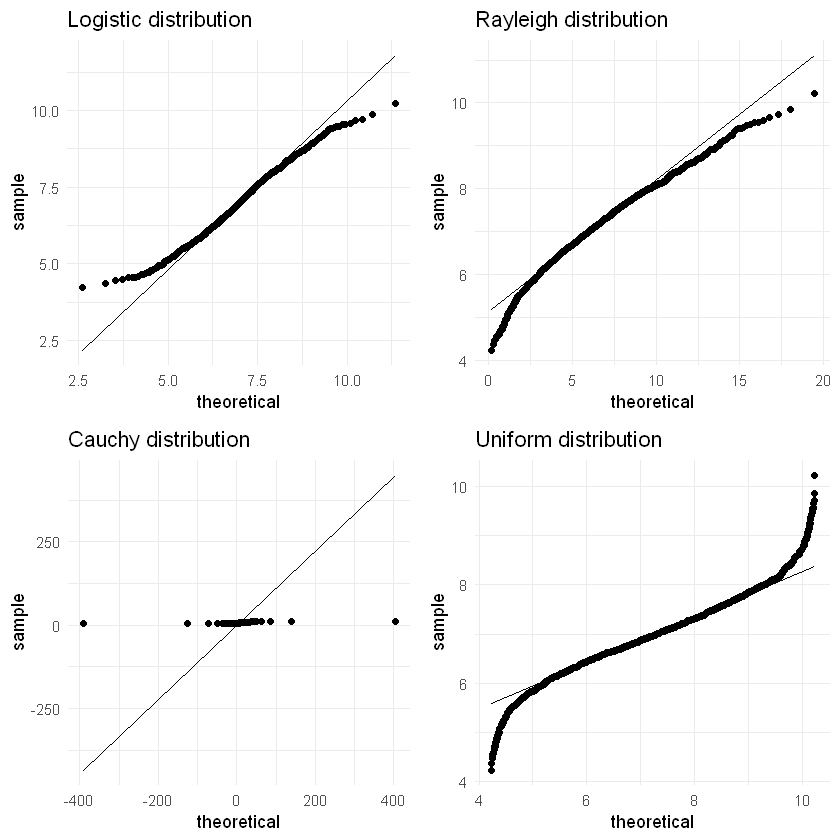

In [13]:
ajuste(x,4)

In [14]:
ajuste(x,5)

,valor.p
,<dbl>
Gamma,0.7628
Log-normal,0.4595
Weibull,0.0462
Logística,0.4833
Normal,0.9513
Rayleigh,0.0000
Cauchy,0.0000
Uniforme,0.0000


In [15]:
x=rrayleigh(80,3)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



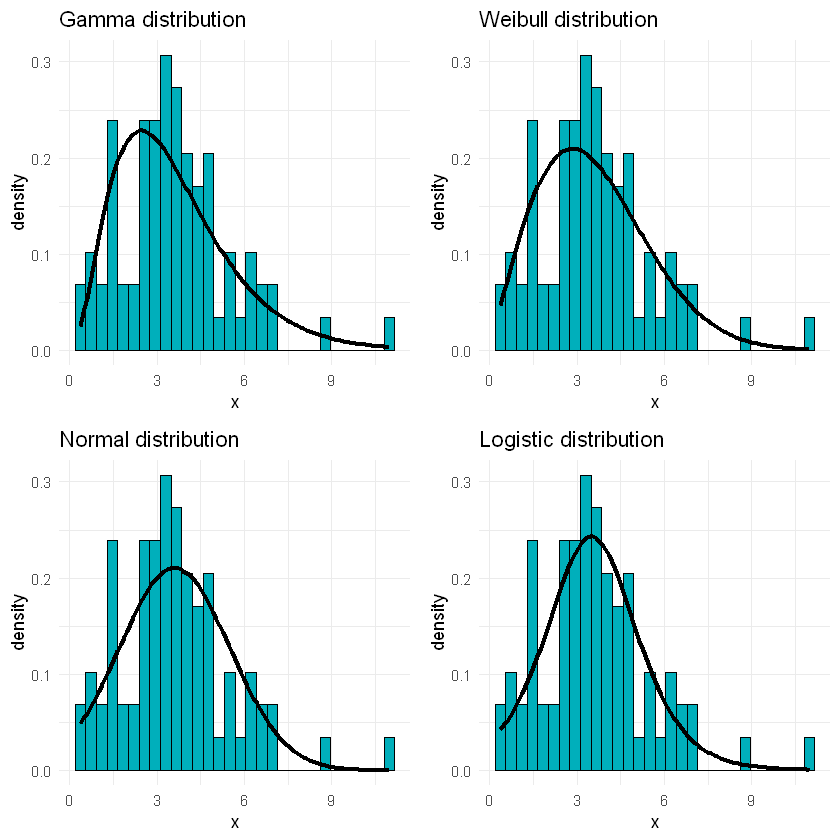

In [16]:
ajuste(x,1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



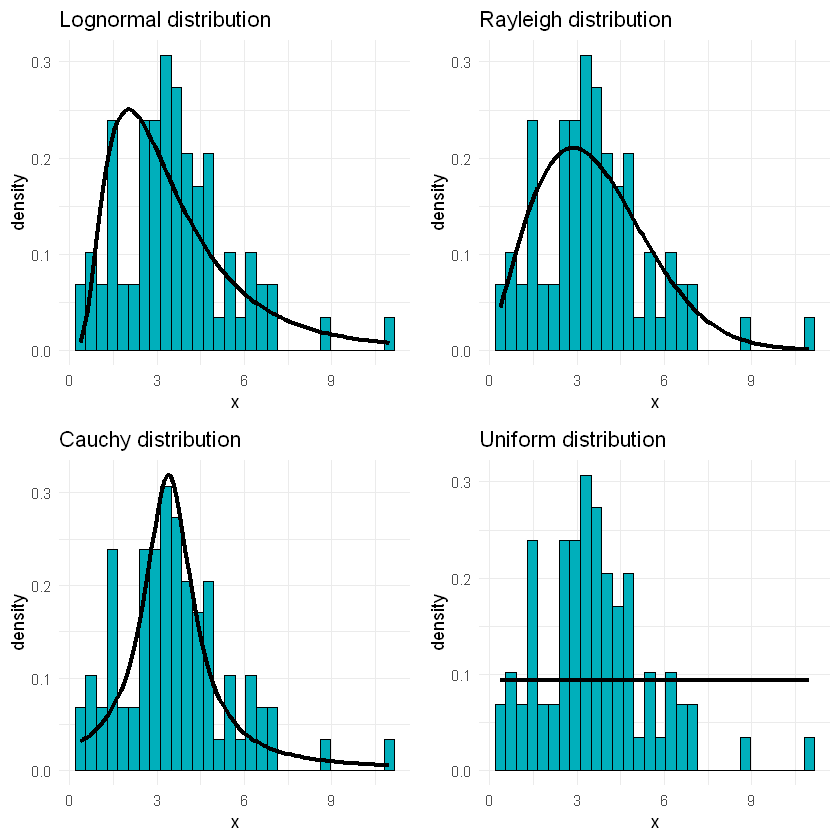

In [17]:
ajuste(x,2)

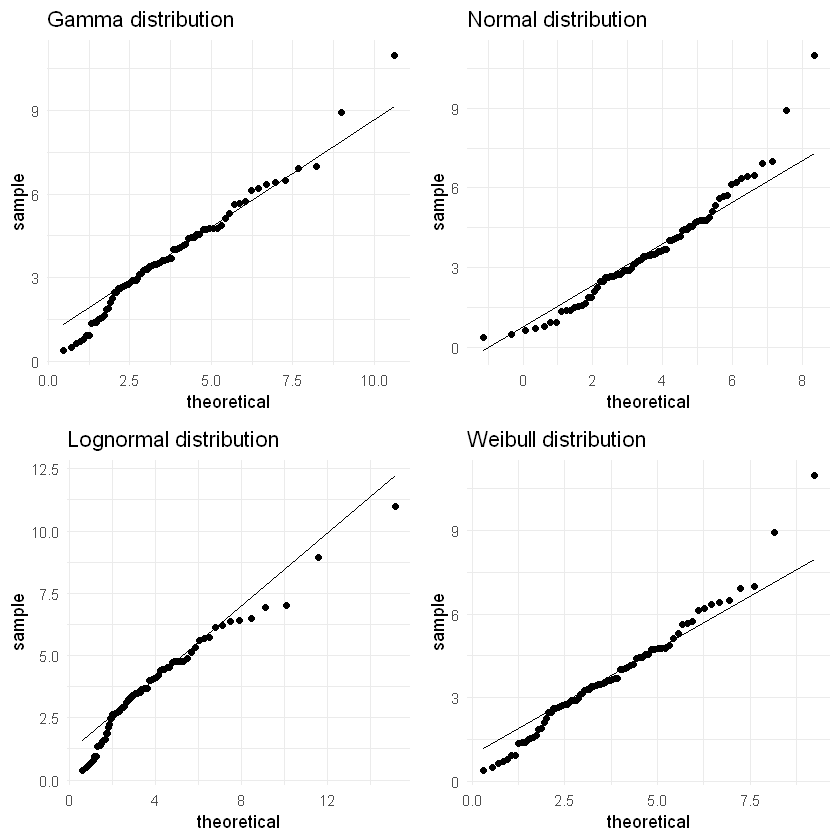

In [18]:
ajuste(x,3)

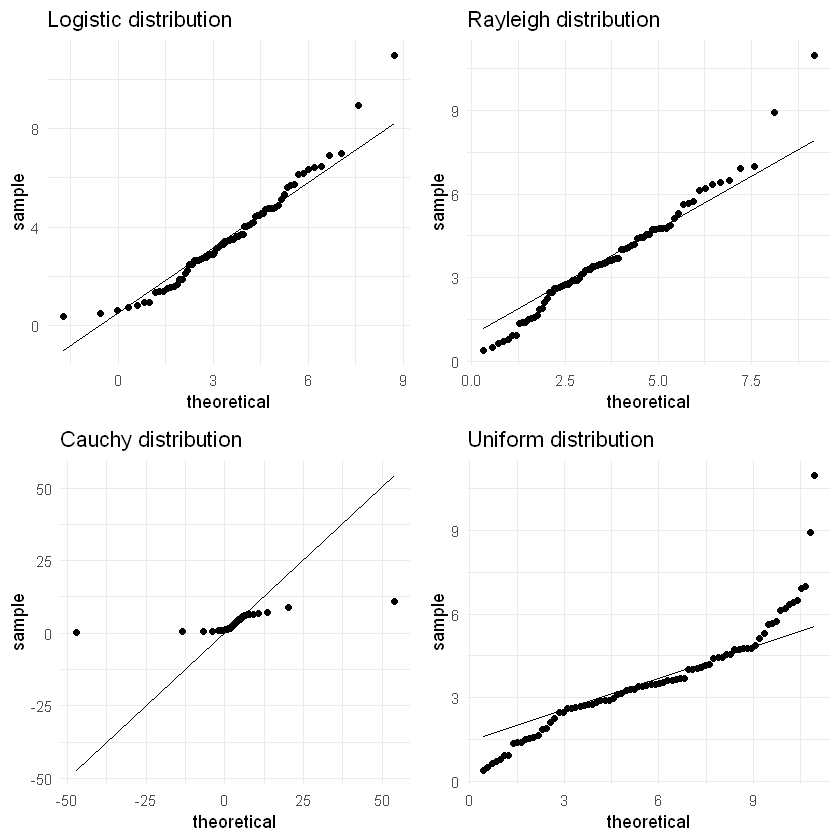

In [19]:
ajuste(x,4)

In [20]:
ajuste(x,5)

,valor.p
,<dbl>
Gamma,0.2255
Log-normal,0.0371
Weibull,0.4817
Logística,0.8514
Normal,0.4263
Rayleigh,0.5337
Cauchy,0.3577
Uniforme,0.0000
